# MONTE CARLO SIMULATIONS FOR OPTION PRICING
# Team 19 - Somdut Roy and Yashovardhan Jallan 


# ABSTRACT

Of all financial products, the most difficult to price are the derivatives. Some derivatives are far more difficult to price than others. The models used to price derivatives can be divided into three broad categories: **analytical models, numeric models, and simulation models**. The latter refers to Monte Carlo simulation, named after a famous casino in Monaco on the French Riviera. Monte Carlo simulation was first used to estimate the probability of winning a game of pure chance. 

The technique works by replicating the outcomes of a stochastic process through the careful use of random numbers. As the number of replications increases, the resulting range of approximation, represented by the average, narrows, converging to the analytically correct solution. Monte Carlo simulation can be used in all sorts of business applications whenever there is a source of uncertainty (such as future stock prices, interest rates, exchange rates, commodity prices etc.). **To illustrate the basic concepts, we will focus on pricing options, which are generally the most difficult types of derivatives to value.**

## Importing the dependencies we will use in this project

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as si
np.set_printoptions(threshold=np.nan)
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})

# INTRODUCTION TO FINANCIAL OPTIONS


# Options Contracts

There are two basic types of options: calls and puts.

## Call Option
A call option gives the holder the right, but not the obligation, to buy the underlying asset by a certain date for a certain price.

## Put Option

A put option gives the holder the right, but not the obligation, to sell the underlying asset by a certain date for a certain price.

## Real World Example of an Option Contract

Suppose that Microsoft shares are trading at $\$108.00$ per share and you believe that they are going to increase in value. While you could simply buy the stock, you want greater earning potential without the use of margin, or borrowed funds.

Call options provide a great alternative way to speculate on this increase in price. You decide to purchase one call option with a **strike price** $(K)$ of $\$115.00$ for one month in the future for $\$0.37$ per contact. Your total cash outlay is $\$37.00$ for $100$ option contracts (the position), plus fees and commissions.

If the stock rises to $\$116.00$, each option will be worth $\$1.00$, since you could exercise the option to acquire the stock for $\$115.00$ and immediately resell it for $\$116.00$. The profit on the option position would be $170.3\%$ since you paid $\$0.37$ and earned $\$1.00$ —that's much higher than the $7.4\%$ increase in the underlying stock price.

If the stock fell to $\$100.00$, your option would expire worthless and you would be out $\$37.00$. The upside is that you didn't have to buy $100$ shares, which would have resulted in a loss of $\$8$ per share, or $\$800$ total loss. Options can help limit your downside.


# Pricing Options

The price, or cost, of an option is an amount of money known as the premium. The buyer pays the premium to the seller in exchange for the right granted by the option. For example, a buyer might pay a seller for the right to purchase 100 shares of stock XYZ at a strike price of $60 on or before April 30th, 2019. If the position becomes profitable, the buyer will decide to exercise the option; if it does not become profitable, the buyer will let the option expire worthless. The buyer pays the premium so that he or she has the "option" (or the choice) to either exercise or allow the option to expire worthless.

Premiums are priced per share.Since equity options are based on 100 stock shares, this particular contract would cost the buyer \$2.93 X 100, or \$293 dollars. The buyer pays the premium whether or not the option is exercised, and the **premium is non-refundable**. The seller gets to keep the premium either way.

## Intrinsic Value and Time Value

The two components of an option premium are the intrinsic value and  time value of the option. 

### Intrinsic Value

The intrinsic value is the difference between the underlying's price and the strike price – or the in-the-money portion of the option's premium. Specifically, the intrinsic value of a call option is equal to the underlying price minus the strike price. For a put option, the intrinsic value is the strike price minus the underlying price. 

Intrinsic Value (Call) = Underlying Price – Strike Price <br>
$ Value (Call) = max(S – K, 0)$

Intrinsic Value (Put) = Strike Price – Underlying Price <br>
$ Value (Put) = max(K - S, 0)$

### Time Value
Any premium that is in excess of the option's intrinsic value is referred to as its time value.

For example, assume a call option has a premium of \$9.00 (this means that the buyer pays – and the seller receives – \$9.00 for each share of stock, or \$900 for the 100-share contract). If the option has an intrinsic value of \$7.00, its time value would then be \$2.00 (\$9.00 - \$7.00 = \$2.00).

In general, the more time to expiration, the greater the time value of the option. It represents the amount of time the option position has to become profitable due to a favorable move in the underlying price. 

An option premium, therefore, is equal to its intrinsic value plus its time value.

$$ Option Premium = Intrinsic Value + Time Value $$

## Factors That Influence Option Price

- **Underlying Price (S)** : The most influential factor on an option premium is the current market price of the underlying asset (stock).
- **Strike Price (K)**- The strike price determines if the option has any intrinsic value. Intrinsic value is the difference between the strike price of the option and the current price of the underlying asset.
- **Time Until Expiration (T)** - The longer an option has until expiration, the greater the chance it will end up in-the-money (profitable). As expiration approaches, the option's time value decreases.
- **Expected Volatility ($\sigma$)** - Volatility is the degree to which price moves, whether it goes up or down. It is a measure of the speed and magnitude of the underlying's price changes. Historical volatility refers to the actual price changes that have been observed over a specified time period. Options traders can evaluate historical volatility to determine possible volatility in the future.
- **Risk Free Interest Rate (r)** - Interest rates have small, but measurable, effects on option prices. In general, as interest rates rise, call premiums increase and put premiums decrease.




# Option Styles based on Exercise Date

- **European Option** -  A European option may be exercised only at the expiration date of the option, i.e. at a single pre-defined point in time.
- **American Option** - American Option on the other hand may be exercised at any time before the expiration date.
- **Bermudan option** - A Bermudan option is an option where the buyer has the right to exercise at a set (always discretely spaced) number of times. This is intermediate between a European option and an American option.
- **Asian Option** - An Asian option (or average option) is an option where the payoff is not determined by the underlying price at maturity but by the average underlying price over some pre-set period of time.



There can be several different types of option styles, based on how the contract is structured. They are called Exotic Options. Some commonly traded exotic options are Barrier, Rainbow, Spread, Basket and Maximum Options etc.

# Analytical Solution to Option Pricing (Black Scholes Model)

The Black-Scholes formula (also called  Black-Scholes-Merton) was the first widely used model for option pricing. It's used to calculate the theoretical value of European-style options using current stock prices, expected dividends, the option's strike price, expected interest rates, time to expiration and expected volatility.

The formula, developed by three economists – Fischer Black, Myron Scholes and Robert Merton – is perhaps the world's most well-known options pricing model. It was introduced in their 1973 paper, "The Pricing of Options and Corporate Liabilities," published in the Journal of Political Economy.

The Black-Scholes model makes certain assumptions:

- The option is European and can only be exercised at expiration.
- No dividends are paid out during the life of the option.
- Markets are efficient (i.e., market movements cannot be predicted).
- There are no transaction costs in buying the option.
- The risk-free rate and volatility of the underlying are known and constant.
- The returns on the underlying are normally distributed.

## Black Scholes Formula

The formula, shown below in the figure, takes the following variables into consideration:

- current underlying price $(S)$
- options strike price $(K)$
- time until expiration, expressed as a fraction of a year $(T)$
- volatility $(\sigma$ or $s)$
- risk-free interest rate $(r)$

We use it to evaluate the price of the option given by $C$.

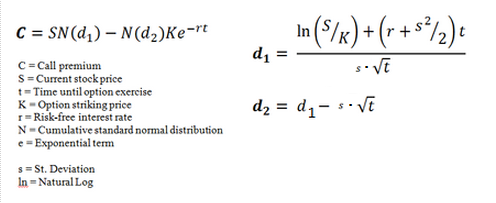

The model is essentially divided into two parts:

The first part, $SN(d_1)$, multiplies the price by the change in the call premium in relation to a change in the underlying price. This part of the formula shows the expected benefit of purchasing the underlying outright. 

The second part, $N(d_2)Ke^{-rt}$, provides the current value of paying the exercise price upon expiration (remember, the Black-Scholes model applies to European options that can be exercised only on expiration day). 

The value of the option is calculated by taking the difference between the two parts, as shown in the equation.

We will use the following function implementing Black-Scholes formula below to compare the results of our simulations with the Black - Scholes Model.

In [2]:
def black_scholes(S, K, T, r, sigma, option = 'call'):    
    #S: spot price
    #K: strike price
    #T: time to maturity
    #r: interest rate
    #sigma: volatility of underlying asset
    
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    
    if option == 'call':
        result = (S * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0))
    if option == 'put':
        result = (K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0) - S * si.norm.cdf(-d1, 0.0, 1.0))
        
    return result

## Limitations of the Black Scholes Formula

Some of the standard limitations of the Black-Scholes model are:

- Assumes constant values for risk free rate of return and volatility over the option duration—none of those may remain constant in the real world
- Assumes continuous and costless trading—ignoring liquidity risk and brokerage charges
- Assumes no dividend payout—ignoring its impact on the change in valuations
- Assumes no early exercise (i.e., fits only European options)—the model is unsuitable for any other type of options
- Other assumptions, which are operational issues, include assuming no penalty or margin requirements for short sales, no arbitrage opportunities and no taxes—in reality, all these do not hold true; either additional capital is needed or realistic profit potential is decreased.

So, although the Black Scholes formula is very powerful in finding the price of a European Option, its usage in other option types are limiting. It cannot be extended to most other types of option contracts. Hence a closed form analytical solution does not exist for most option contracts.



# Need for Simulation Techniques

When an analytical solution is not available, simulation techniques are our only bet to price financial options.

Monte Carlo methods are a class of computational algorithms that are based on repeated computation and random sampling. Monte Carlo simulation is used in finance to value and analyse instruments, portfolios and investments by simulating the sources of uncertainty that affect their value. Options can be priced by Monte Carlo simulation. 

# Outline for the Simulation Techniques

**In this project, we demonstrate two Monte Carlo Simulation techniques** to simulate the stock price in the future and based on stock price paths, we will then calculate the option values. In the case of European Options, we will compare our results to the analytical solution as well.


For demonstration of the simulation techniques, we take a hypothetical stock, and create a starting condition <br>
- Initial Stock price $(S_{0}) = \$100$.
- Current Risk Free Interest Rate $(r) = 5\%$
- Volatility of the Stock $ (\sigma) = 20\%$

We simulate the stock price for a period of two years, with our minimum time step as 1 day. In the stock market, stock trading only takes place on the weekdays (except holidays). So, as a general convention, we assume that there are **252 trading days in a year**.

Hence, the time period of simulation is 
- Time $(T) = 2$ years
- Number of Time Steps ($n\_steps$) = $ 2 * 252 = 504$
- Smallest Time Step $(dt) = T/n\_steps$

The main idea is to run the simulation process for a really large number of scenarios. Here we run the process for $N$ Simulations.

- Number of Simulation $(N) = 10,000 $

These values are chosen for demonstration of the simulation technique and can be changed as and when required.


In [3]:
# Initial Stock price
S_0 = 100

# Time to maturity in years
T = 2

# Risk-free rate of interest
r = 0.05

# Historical Volatility
sigma = 0.2

# Number of time steps for simulation
n_steps = 504 

# Time step in years
dt = T/n_steps

# Number of simulations
N = 10000

# 1st Simulation technique - Binomial Model of Stock Price Simulation

The binomial model was first proposed by Cox, Ross and Rubinstein in 1979. Essentially, the model uses a "discrete-time" (lattice based) model of the varying price over time of the underlying financial instrument.

Although computationally slower than the Black–Scholes formula, it is more accurate, particularly for longer-dated options on securities with dividend payments. For these reasons, various versions of the binomial model are widely used by practitioners in the options markets.

### Method

The binomial pricing model traces the evolution of the option's key underlying variables in discrete-time. This is done by means of a binomial lattice (tree), for a number of time steps between the valuation and expiration dates. Each node in the lattice represents a possible price of the underlying stock at a given point in time.

The tree of prices is produced by working forward from valuation date to expiration.

At each step, it is assumed that the underlying instrument will move up or down by a specific factor $u$ or $d$ per step of the tree (where, by definition,  $u \geq 1$ and $0 < d \le 1$ . So, if $S$ is the current price, then in the next period the price will either be $S_{up}=S \cdot u$ or $S_{down}=S \cdot d$.

The up and down factors are calculated using the underlying volatility, $\sigma $, and the time duration of a step, $t$, measured in years (using the day count convention of the underlying instrument). From the condition that the variance of the log of the price is $\sigma ^{2}t$, we have:

$$ u=e^{\sigma {\sqrt {t}}}$$ <br>
$$ d=e^{-\sigma {\sqrt {t}}}$$

In the model, the probability of the stock price following the up step is $p$ and that of following the down step is $1 - p$.

Here in this model, $ p = \frac {e^{rdt} - d} {u - d}$ as shown in the figure as well.

We are going to use these formulae for our simulation. These are widely accepted in the world of finance and the reader can refer to the references at the end of this demonstration, to understand the intricacies of the mathematics behind it.

The binomial model of generating stock prices can be seen in the figure below.

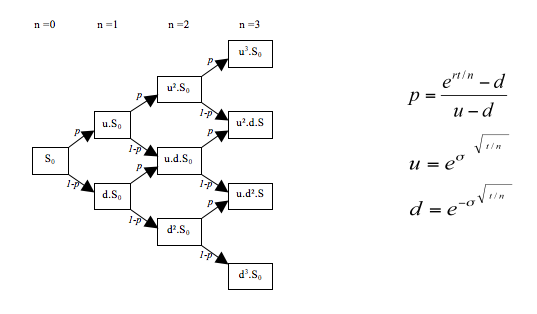

### Implementation

We create a numpy 2D array to simulate the stock prices using the binomial model. We initialize a zero filled numpy 2D array with the number of time steps as the row count, and the total number of sample paths as the column count.

We then initialie the first row with the starting stock price $S_{0} = \$100$

In [4]:
Stock_Prices_Binomial = np.zeros((int(n_steps), N))
Stock_Prices_Binomial[0] = S_0

For demonstration, we are looking at 10 sample paths, each showing first 5 days of stock prices. Right now, we have only initialized it.

In [5]:
pd.DataFrame(Stock_Prices_Binomial[:5,:10]).round(3)

,0,1,2,3,4,5,6,7,8,9
0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Next, we define the parameters of the Binomial Model.

In [6]:
u=np.exp(sigma *np.sqrt(dt))
d=np.exp(-sigma *np.sqrt(dt))
p=(np.exp(r*dt)-d)/(u-d)

print(" u = ", round(u, 3))
print(" d = ", round(d, 3))
print(" p = ", round(p, 3))

 u =  1.013
 d =  0.987
 p =  0.505


Now, we simulate the stock price over the entire time period $T = 2$ years, for all the $N=10,000$ simulations. To do this, we have used a uniform random number generator to get a number between $0$ and $1$. 

If the uniform random number is less than $p$, then we take it as an up-step, otherwise, it is a down step.

Numpy allows us to do this this very quickly by vectorizing, and hence we do not need to write lengthy $for$ loops.

For demonstration, we look at the first $5$ random draws and how the comparison is done.

In [7]:
Z = np.random.uniform(size=N)
print(Z[:5])
Z=np.where(Z<p,u,d)
print(Z[:5])

[0.125 0.542 0.818 0.435 0.488]
[1.013 0.987 0.987 1.013 1.013]


Now, we simulate the stock price over the entire $2$ year period.

In [8]:
for t in range(1, n_steps):    
    Z = np.random.uniform(size=N)
    Z=np.where(Z<p,u,d)
    Stock_Prices_Binomial[t] = Stock_Prices_Binomial[t - 1] *Z

In the stock matrix print below, we see 5 (out of N =10000) stock paths for the first 10 days. We have gotten this using Binomial Simulation technique.

In [9]:
pd.DataFrame(Stock_Prices_Binomial[:10,:5]).round(3)

,0,1,2,3,4
0,100.000,100.000,100.000,100.000,100.000
1,101.268,98.748,101.268,98.748,98.748
2,102.552,100.000,102.552,100.000,97.512
3,103.852,101.268,101.268,98.748,96.291
4,105.169,100.000,102.552,100.000,95.085
5,106.502,101.268,103.852,101.268,93.895
6,105.169,100.000,105.169,102.552,92.719
7,106.502,101.268,103.852,101.268,91.559
8,105.169,100.000,105.169,100.000,90.412
9,103.852,101.268,103.852,98.748,89.280


In the plot below, we show the simulation of first 100 sample stock paths. Remember, we have simulated for N = 10000 paths.

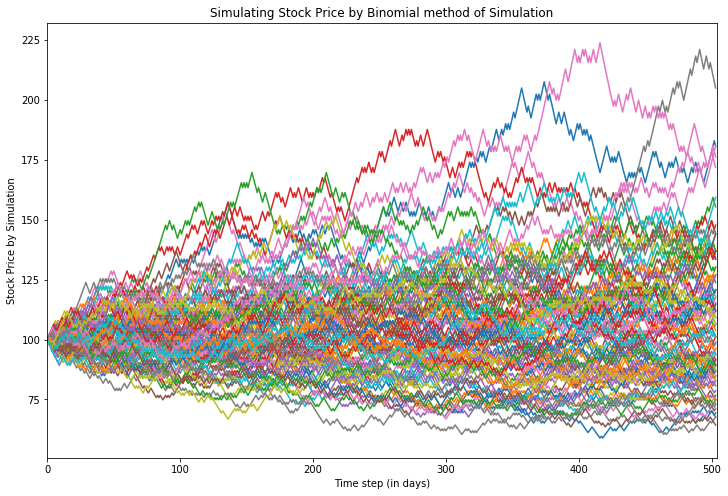

In [10]:
plt.figure(figsize=(12,8))
plt.plot(Stock_Prices_Binomial[:,0:100])
plt.xlim([0, n_steps])
plt.ylabel("Stock Price by Simulation")
plt.xlabel("Time step (in days)")
plt.title("Simulating Stock Price by Binomial method of Simulation")
plt.show()

So, our first simulation technique of using Binomial Method to simulate stock price has been successful. We can see from the plot that we get a rich sample of stock price paths, each starting at an initial value of \$100, and then evolving over the period of 2 years.

Next, we will look at another (slightly more sophisticated) technique of simulating stock prices.

# 2nd Simulation technique - Geometric Brownian Motion (GBM) Simulation of Stock Price

The binomial method of stock price simulation is a very good and simple model to understand the evolution of stock prices. However, it is very naive by nature. It assumes that there are only two states of the world, the stock will either move up by a certain factor $u$, or go down by a factor $d$.

However, the real stock markets do not just show a two state process. In real life, stock prices can take any value, as long it is a continuous progression. We now introduce the Geometric Brownian Motion method of Stock Price Simulation.

### Method

Simulations of stocks and options are often modeled using stochastic differential equations (SDEs). Because of the randomness associated with stock price movements, the models cannot be developed using ordinary differential equations (ODEs).

A typical model used for stock price dynamics is the following stochastic differential equation:

$$ dS_{t} = \mu S dt + \sigma S dW_{t}$$ <br>

where $S$ is the stock price, $μ$ is the drift coefficient, $σ$ is the diffusion coefficient, and $W_{t}$ is the Brownian Motion.

In modeling a stock price, the drift coefficient represents the mean of returns over some time period, and the diffusion coefficient represents the standard deviation of those same returns.

The Brownian Motion $W_{t}$ is the random portion of the equation. Each Brownian increment $W_{i}$ is computed by multiplying a standard random variable $z_{i}$ from a normal distribution $N(0,1)$ with mean $0$ and standard deviation $1$ by the square root of the time increment $\sqrt{dt}$.

$$W_{i} = z_{i}\sqrt{dt} $$

The cumulative sum of the Brownian increments is the discretized Brownian path.

$$W_{n}(t) = \sum_{i=1}^{n} W_{i}(t)$$

For the SDE above with an initial condition for the stock price of $S(0) = S_0$, the closed-form solution of Geometric Brownian Motion (GBM) is:

$$ S(t) = S_0 e^{(μ−\frac{1}{2}σ^{2})t + σW_t} $$

For purposes of stock price simulation, we assume that $μ = r$, where $r$ is the risk-free rate. The basis of this assumption is rooted in Risk-Neutral probability simulation of stock price, which is outside the scope of this tutorial, so we go ahead with this assumption.

### Implementation

Before we can model the closed-form solution of GBM, we need to model the Brownian Motion. This is the stochastic portion of the equation. To do this we’ll need to generate the standard random variables from the normal distribution $N(0,1)$. Next, we’ll multiply the random variables by the square root of the time step. The final step is to compute a cumulative sum to generate the Brownian Motion.

Like before, we create a numpy 2D array to simulate the stock prices using the GBM model. We initialize a zero filled numpy 2D array with the number of time steps as the row count, and the total number of sample paths as the column count.

We then initialize the first row with the starting stock price $S_{0} = \$100$

In [11]:
Stock_Prices_GBM = np.zeros((n_steps, N))
Stock_Prices_GBM[0] = S_0

In [12]:
pd.DataFrame(Stock_Prices_GBM[:5,:10]).round(3)

,0,1,2,3,4,5,6,7,8,9
0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Now, like before, we simulate the stock price over the entire time period $T = 2$ years, for all the $N=10,000$ simulations.

For Geometric Brownian Motion, we generate a random number from the Standard Normal Distribution. This is used to get the value of $W$ like described earlier.

For time-step, we generate N = 10000 different draws from the Std Normal Generators. We show the first five random variables for demonstration below.

In [13]:
Z = np.random.standard_normal(N)
print(Z[:5])

[-1.471 -0.231 0.690 0.093 1.336]


Now, we simulate the stock price over the entire $2$ year period.

In [14]:
for t in range(1, n_steps):
    # Draw random normal values to simulate Brownian motion
    Z = np.random.standard_normal(N)
    Stock_Prices_GBM[t] = Stock_Prices_GBM[t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt + (sigma * np.sqrt(dt) * Z))

In the stock matrix print below, we see 5 (out of N =10000) stock paths for the first 10 days. We have gotten this using Geometric Brownian Motion Simulation technique.

In [15]:
pd.DataFrame(Stock_Prices_GBM[:10,:5]).round(3)

,0,1,2,3,4
0,100.000,100.000,100.000,100.000,100.000
1,101.484,99.959,100.409,99.029,97.880
2,101.931,99.373,98.902,100.082,97.654
3,100.277,100.139,98.827,100.548,96.771
4,101.144,99.108,97.998,100.436,93.846
5,102.715,97.568,98.900,100.333,94.982
6,104.194,96.505,98.863,99.464,95.178
7,103.693,95.198,100.445,99.532,94.254
8,101.909,95.661,100.722,99.316,94.400
9,101.801,95.902,99.629,99.683,94.144


Like before, in the plot below, we show the simulation of first 100 sample stock paths. Remember, we have simulated for N = 10000 paths.

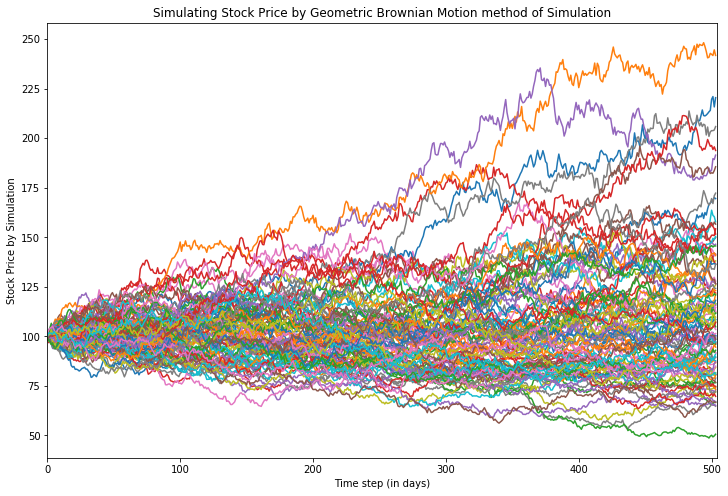

In [16]:
plt.figure(figsize=(12,8))
plt.plot(Stock_Prices_GBM[:,0:100])
plt.xlim([0, n_steps])
plt.ylabel("Stock Price by Simulation")
plt.xlabel("Time step (in days)")
plt.title("Simulating Stock Price by Geometric Brownian Motion method of Simulation")
plt.show()

So, now our second simulation technique of using GBM Method to simulate stock price has also been successful. We can see from the plot that we get a rich sample of stock price paths, each starting at an initial value of \$100, and then evolving over the period of 2 years.

# Using Simulation to Price Options

Using this Simulation, we will demonstrate the pricing of 2 types of Options.

- European Call Option (Strike (K) = 95, Time to Maturity (T) = 2)
- Asian Call Option (Strike (K) = 95, Time to Maturity (T) = 2)

For the European Option, we will compare the solution to the analytical solution by Black Scholes Model. Once this is comparable to the analytical solution, we can them determine the veracity of our simulation. 

We then go on to price the Asian option, for which we do not have a closed form analytical solution. Hence, we use our simulation approach to get its fair value.

## 1. European Call Option (Strike (K) = 95, Time to Maturity (T) = 2)

In [17]:
# Strike price for call option
K = 95

### Analytical Solution using Black Scholes Model

In [18]:
analytical_solution=black_scholes(S_0, K, T, r, sigma, option = 'call')
print(" The price of the European Call option using Analytical solution is = $"+str(round(analytical_solution,2)))

 The price of the European Call option using Analytical solution is = $18.93


### Simulation Solution using Binomial Model


We get the final stock price at the end of two years from the simulation and store it in a list. The goal is to use this to represent all the different possible scenarios of the stock price in the future. Using this, we then calculate the option payoff for each of the cases by the formula : 

European Call Payoff = $max (S - K, 0)$

We get this payoff for all the $N=10,000$ different simulations, and then we take their mean (average) to get the payoff of the option in 2 years time.

Last step is to discount the payoff two years later to today, and find its time-discounted price today.

In [19]:
simulated_stock_prices_at_T=Stock_Prices_Binomial[-1]
C = np.exp(-r * T) * 1 / N * np.sum(np.maximum(simulated_stock_prices_at_T - K, 0))

In [20]:
print(" The price of the European Call option using Binomial Simulation is = $"+str(round(C,2)))

 The price of the European Call option using Binomial Simulation is = $18.83


### Simulation Solution using GBM Model

Similarly, we get the simulated stock prices usign GBM and get the value of the option.

In [21]:
simulated_stock_prices_at_T=Stock_Prices_GBM[-1]
C = np.exp(-r * T) * 1 / N * np.sum(np.maximum(simulated_stock_prices_at_T - K, 0))
print(" The price of the European Call option using GBM Simulation is = $"+str(round(C,2)))

 The price of the European Call option using GBM Simulation is = $18.88


### Comparison

We see that the solution produced by all the three methods are very close. The fact that our simulation model solutions are close to analytical solution tells us that our simulation methodology is correct.

There is no way to tell which is the correct solution, because a **correct solution** does not exist. However, it is agreed by most researchers and practitioners that the **GBM** method of simulation is the best way to make these projections in the market and it is a largely accepted method of pricing options.

## 2. Asian Call Option (Strike (K) = 95, Time to Maturity (T) = 2)

An Asian option is an option type where the payoff depends on the average price of the underlying asset over a certain period of time. These options allow the buyer to purchase (or sell) the underlying asset at the average price instead of the spot price.

Asian options are also known as average options.

### Simulation Solution using Binomial Model


In [22]:
average_stock_prices=pd.DataFrame(Stock_Prices_Binomial).mean()

In [23]:
C = np.exp(-r * T) * 1 / N * np.sum(np.maximum(average_stock_prices - K, 0))
print(" The price of the Asian Call option using GBM Simulation is = $"+str(round(C,2)))

 The price of the Asian Call option using GBM Simulation is = $11.62


### Simulation Solution using GBM Model

In [24]:
average_stock_prices=pd.DataFrame(Stock_Prices_GBM).mean()

In [25]:
C = np.exp(-r * T) * 1 / N * np.sum(np.maximum(average_stock_prices - K, 0))
print(" The price of the Asian Call option using GBM Simulation is = $"+str(round(C,2)))

 The price of the Asian Call option using GBM Simulation is = $11.63


### Comparison

We see that value of the Asian Call option is found by both approaches which are really close. As mentioned earlier, there is no analytical solution for Asian options, so this is how they are priced in the real world as well.

# Conclusion

In this project, we have used two Monte Carlo methods to simulate stock prices in the financial markets and then we have used the simulations to price options. For European options, we have compared the solution to the analytical solution using Black Scholes Model and have established that our simulation gives us similar results. Hence our process is correct.

Having established that our process works correctly, we have used it to price an Asian Option, for which there does not exist an analytical solution.

This entire exercise is a demonstration of the simulation procedure and can be extended to price various different types of path-dependent options, which cannot be priced analytically.

# References

- Black, Fischer; Myron Scholes (1973). "The Pricing of Options and Corporate Liabilities". Journal of Political Economy. 81 (3): 637–654. doi:10.1086/260062
-  Cox, J. C.; Ross, S. A.; Rubinstein, M. (1979). "Option pricing: A simplified approach". Journal of Financial Economics. 7 (3): 229. CiteSeerX 10.1.1.379.7582. doi:10.1016/0304-405X(79)90015-1
- Ross, Sheldon M. (2014). "Variations on Brownian Motion". Introduction to Probability Models (11th ed.). Amsterdam: Elsevier. pp. 612–14. ISBN 978-0-12-407948-9